In [1]:
import pandas as pd
import numpy as np

from DataPreparation import DataPreparation

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/balanced_dataframe.csv', index_col=None)
df.head()

,MaxAbsEStateIndex,MinAbsEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,...,fr_Nhpyrrole,fr_aldehyde,fr_amidine,fr_aryl_methyl,fr_benzene,fr_benzodiazepine,fr_diazo,fr_halogen,fr_hdrzine,label
0,10.337455,-1.272753,23.375000,505.329,79.918731,10.123678,9.103951,-0.051090,3.459112,1.375036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,10.335047,-1.271941,23.375000,505.329,79.918731,10.124302,9.103026,-0.051090,3.450909,1.367373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,10.333078,-1.271281,23.375000,505.329,79.918731,10.124439,9.103025,-0.051090,3.448581,1.360843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,10.355554,-1.235039,25.218750,440.504,16.562573,9.897992,5.825210,-0.051059,3.346646,1.323034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6.090409,0.226017,12.285714,362.614,79.918731,10.103988,9.101988,0.552888,3.020157,1.976391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
X = df.drop(columns=['label'])
y = df['label']

,PEOE_VSA13,Chi3v,FpDensityMorgan3,Kappa1,BertzCT,EState_VSA3,SMR_VSA4,BCUT2D_LOGPLOW,Chi2n,qed,EState_VSA11,BCUT2D_MWHI,MinPartialCharge,MinAbsEStateIndex,SMR_VSA2,SlogP_VSA3,Kappa3,MaxPartialCharge,SlogP_VSA1,PEOE_VSA3
0,15.929944,24.793308,9.103951,30.960622,0.000000,4.0,20.939096,3.068350e+07,17.696186,23.375000,1.0,-0.051090,10.123678,-1.272753,17.475505,0.116048,40.759436,79.918731,13.782540,0.000000
1,15.929944,24.793308,9.103026,30.960622,0.000000,4.0,20.939096,3.001086e+07,23.762553,23.375000,1.0,-0.051090,10.124302,-1.271941,11.828328,0.117146,40.759436,79.918731,13.772163,0.000000
2,15.929944,24.793308,9.103025,30.960622,0.000000,4.0,20.939096,2.989174e+07,17.696186,23.375000,1.0,-0.051090,10.124439,-1.271281,11.828328,0.117998,40.759436,79.918731,13.773383,0.000000
3,0.000000,20.056445,5.825210,56.643908,0.000000,3.0,12.841643,3.243335e+07,48.794463,25.218750,1.0,-0.051059,9.897992,-1.235039,5.817863,0.553914,41.216776,16.562573,7.108612,0.000000
4,27.530884,4.417151,9.101988,6.420822,0.000000,3.0,28.935581,1.167653e+05,45.758864,12.285714,1.0,0.552888,10.103988,0.226017,5.948339,0.898357,51.150887,79.918731,6.271772,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,11.336786,0.000000,7.218019,27.315968,5.559267,3.0,15.780072,1.688028e+05,30.537829,11.304348,1.0,0.492694,10.208623,-0.411430,11.477173,0.579532,50.667004,32.133549,2.264240,12.841643
6096,0.000000,18.221247,7.926766,19.889315,0.000000,0.0,5.697039,2.721476e+05,13.847474,29.375000,0.0,-0.845814,10.227966,-3.541177,5.907180,-0.018440,22.375235,32.233449,27.154937,0.000000
6097,11.600940,19.428958,6.324554,45.572602,5.907180,2.0,57.680175,1.193943e+08,38.821852,22.542857,0.0,-0.667596,9.704724,-0.204735,29.189097,1.136124,40.369838,35.495692,5.237276,25.180371
6098,11.761885,14.325937,8.000113,17.330112,0.000000,2.0,24.725238,4.473418e+06,19.056471,18.250000,1.0,-0.126220,10.296962,-0.464767,11.938294,0.505647,30.331835,32.166684,7.406409,0.000000


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y
                                                    )
# y_test.value_counts()

In [5]:
X_test.shape

(1830, 112)

In [7]:
data_preparation = DataPreparation(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = data_preparation.clean_dataset()

In [8]:
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [10]:
svc = SVC(random_state=0)

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
param_grid = {'C':[1, 10, 100],
                  'gamma':[0.01,0.001, 'auto', 'scale']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(svc, param_grid, cv=cv, scoring=scoring, refit='AUC', verbose=1, n_jobs=-1)

%time grid.fit(X_train, y_train)

print()
print(grid.best_params_)

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)

score = roc_auc_score(y_test, y_pred)
print("Mean ROC AUC:", score)

Fitting 30 folds for each of 12 candidates, totalling 360 fits
CPU times: user 1.15 s, sys: 168 ms, total: 1.32 s
Wall time: 1min 44s

{'C': 10, 'gamma': 0.01}
Accuracy: 0.9754098360655737
Mean ROC AUC: 0.9754098360655739


In [77]:
y_pred = grid.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
cm = confusion_matrix(y_train, y_pred)
print("Accuracy:", accuracy)

score = roc_auc_score(y_train, y_pred)
print("Mean ROC AUC:", score)

Accuracy: 0.9976580796252927
Mean ROC AUC: 0.9976580796252927


1 122
>1, train: 0.751, test: 0.750
>2, train: 0.858, test: 0.851
>3, train: 0.890, test: 0.878
>4, train: 0.895, test: 0.882
>5, train: 0.906, test: 0.887
>6, train: 0.926, test: 0.913
>7, train: 0.936, test: 0.926
>8, train: 0.940, test: 0.927
>9, train: 0.942, test: 0.936
>10, train: 0.946, test: 0.931
>11, train: 0.952, test: 0.933
>12, train: 0.958, test: 0.939
>13, train: 0.962, test: 0.942
>14, train: 0.964, test: 0.944
>15, train: 0.968, test: 0.949
>16, train: 0.971, test: 0.948
>17, train: 0.975, test: 0.954
>18, train: 0.975, test: 0.957
>19, train: 0.978, test: 0.961
>20, train: 0.980, test: 0.958
>21, train: 0.981, test: 0.962
>22, train: 0.982, test: 0.966
>23, train: 0.982, test: 0.963
>24, train: 0.984, test: 0.964
>25, train: 0.985, test: 0.967
>26, train: 0.985, test: 0.964
>27, train: 0.986, test: 0.966
>28, train: 0.987, test: 0.967
>29, train: 0.988, test: 0.969
>30, train: 0.989, test: 0.968
>31, train: 0.988, test: 0.969
>32, train: 0.988, test: 0.967
>33, train:

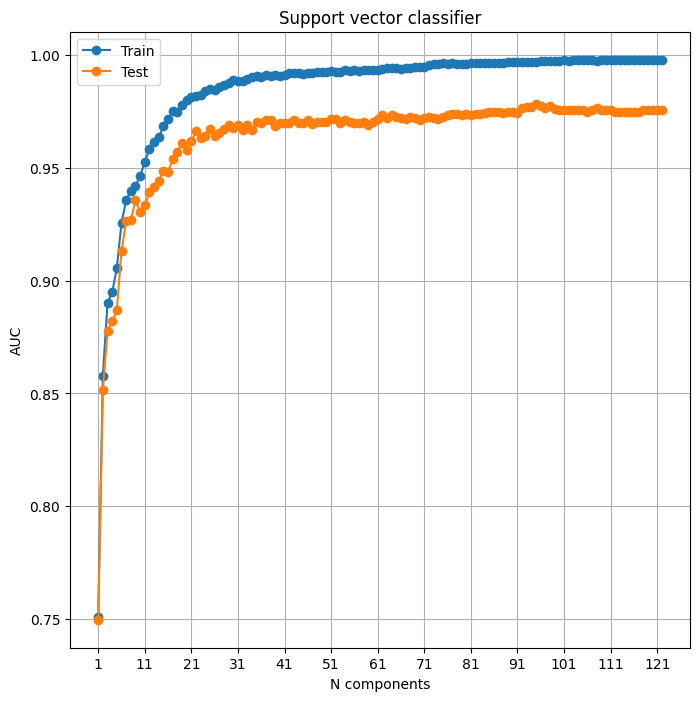

In [11]:
from sklearn.decomposition import PCA

values = [i for i in range(1, X_train.shape[1]+1)]
print(values[0], values[-1])
train_scores = []
test_scores = []

for i in values:
    model = SVC(C=10, gamma=0.01)
    pca = PCA(n_components = i)
    pca_traindata = pca.fit(X_train)

    pcatrain = pca_traindata.transform(X_train)
    pcatest = pca_traindata.transform(X_test)

    model.fit(pcatrain, y_train)
    train_yhat = model.predict(pcatrain)
    train_acc = roc_auc_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = model.predict(pcatest)
    test_acc = roc_auc_score(y_test, test_yhat)
    test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.figure(1, figsize=(8,8))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 122, 10))
plt.grid()
plt.title('Support vector classifier')
plt.ylabel('AUC')
plt.xlabel('N components')
# plt.show()
plt.savefig(f'{pics}/clf_dtree_balanced.png')

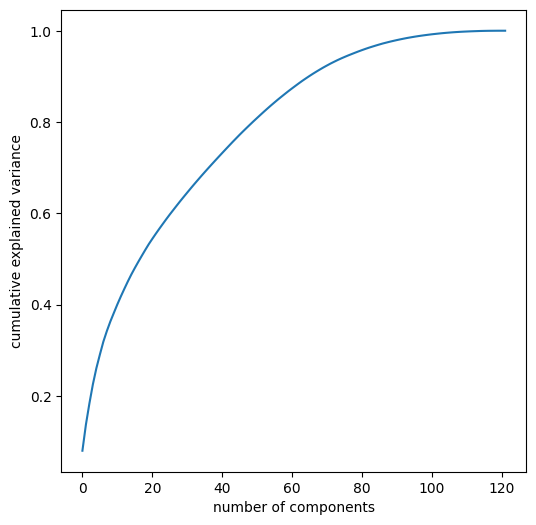

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 122)
pca_traindata = pca.fit(X_train)


pcatrain = pca_traindata.transform(X_train)
pcatest = pca_traindata.transform(X_test)
cum_ratio = (np.cumsum(pca_traindata.explained_variance_ratio_))

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(cum_ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
# plt.savefig(f'{pics}/pca.png')

In [22]:
pca = PCA(n_components = 100)
pca_traindata = pca.fit(X_train)


pcatrain = pca_traindata.transform(X_train)
pcatest = pca_traindata.transform(X_test)
cum_ratio = (np.cumsum(pca_traindata.explained_variance_ratio_))

clf = SVC(C=10, gamma=0.01)

clf.fit(pcatrain, y_train)

train_preds = clf.predict(pcatrain)
print(roc_auc_score(y_train, train_preds))
test_preds = clf.predict(pcatest)
print(roc_auc_score(y_test, test_preds))

0.997423887587822
0.9754098360655739


# Permutation feature importance

In [12]:
from sklearn.inspection import permutation_importance

In [14]:
clf = SVC(C=10, gamma=0.01)

clf.fit(X_train, y_train)

result = permutation_importance(clf, X_train, y_train, n_repeats=5, random_state=42, n_jobs=8)
perm_sorted_idx = result.importances_mean.argsort()

In [15]:
train_preds = clf.predict(X_train)
print(roc_auc_score(y_train, train_preds))
test_preds = clf.predict(X_test)
print(roc_auc_score(y_test, test_preds))

0.9976580796252927
0.9754098360655739


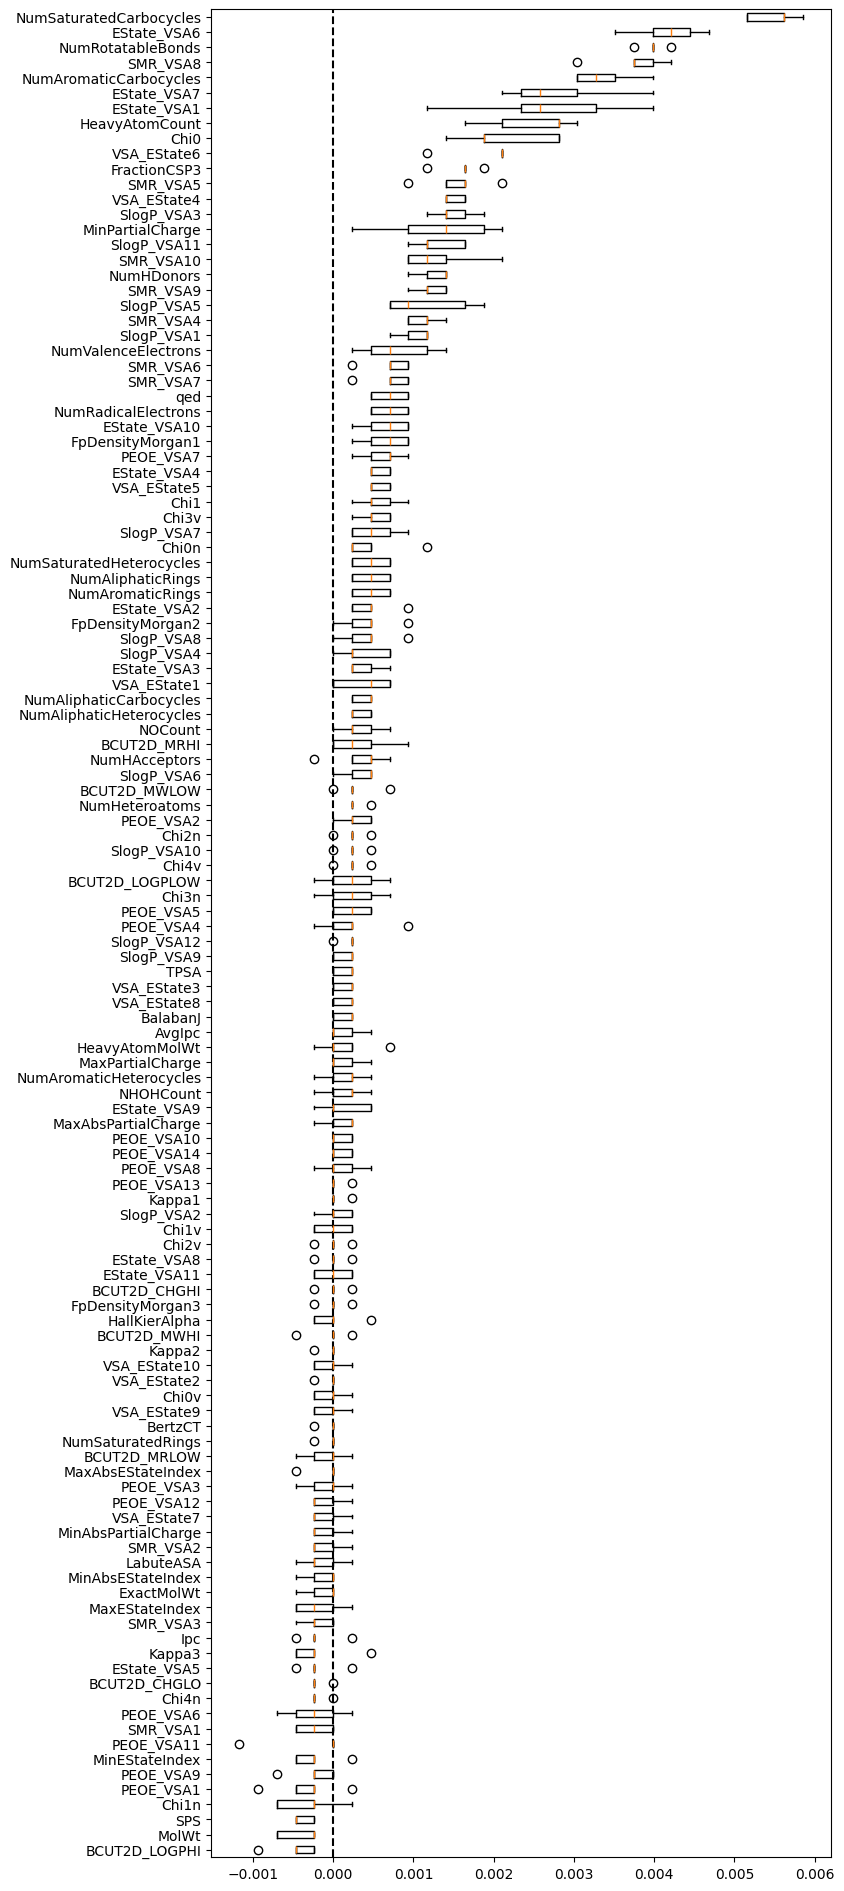

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 24))
plt.title('Permuatation impoartnces (train set)')
ax.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X.columns[perm_sorted_idx],
)
ax.axvline(x=0, color="k", linestyle="--")

In [24]:
clf1 = SVC(C=10, gamma=0.01)
vals = perm_sorted_idx[:15]

clf1.fit(X_train[vals], y_train)

# result = permutation_importance(clf, X_train, y_train, n_repeats=5, random_state=42, n_jobs=8)
# perm_sorted_idx = result.importances_mean.argsort()
# perm_sorted_idx

train_preds = clf1.predict(X_train[vals])
print(roc_auc_score(y_train, train_preds))
test_preds = clf1.predict(X_test[vals])
print(roc_auc_score(y_test, test_preds))

0.9304449648711945
0.9262295081967213


In [30]:
acc_train = []
acc_test = []
num_features = [i for i in range(1, len(perm_sorted_idx + 1))]

for i in num_features:
    clf1 = SVC(C=10, gamma=0.01)
    vals = perm_sorted_idx[:i]
    clf1.fit(X_train[vals], y_train)

# result = permutation_importance(clf, X_train, y_train, n_repeats=5, random_state=42, n_jobs=8)
# perm_sorted_idx = result.importances_mean.argsort()
# perm_sorted_idx
    train_preds = clf1.predict(X_train[vals])
    test_preds = clf1.predict(X_test[vals])
    
    
    

    acc_train.append(roc_auc_score(y_train, train_preds))
    acc_test.append(roc_auc_score(y_test, test_preds))

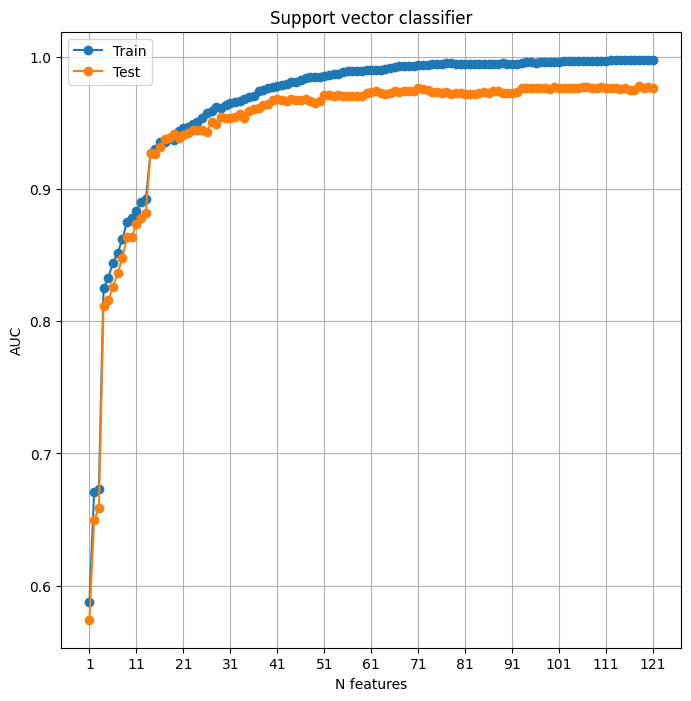

In [32]:
plt.figure(1, figsize=(8,8))
plt.plot(num_features, acc_train, '-o', label='Train')
plt.plot(num_features, acc_test, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 122, 10))
plt.grid()
plt.title('Support vector classifier')
plt.ylabel('AUC')
plt.xlabel('N features')
plt.show()
# plt.savefig(f'{pics}/clf_dtree_balanced.png')

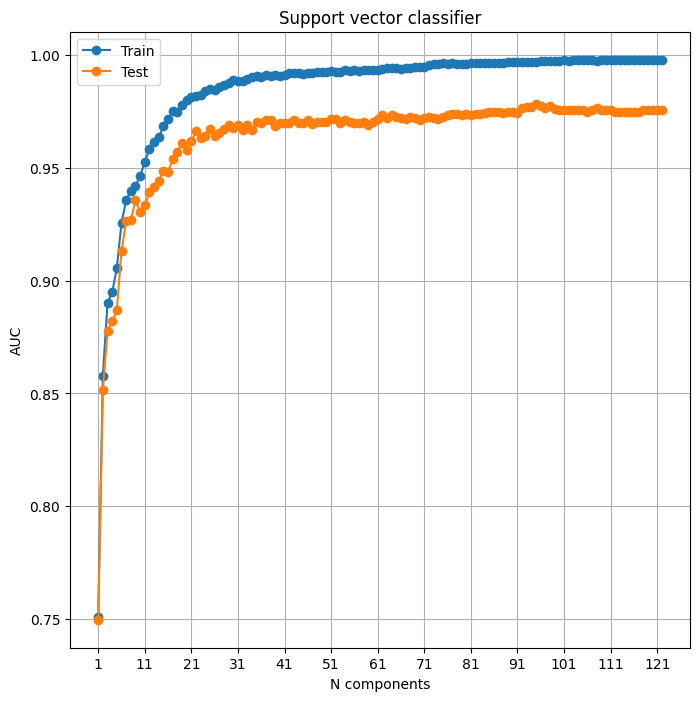

In [33]:
plt.figure(1, figsize=(8,8))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xticks(range(1, 122, 10))
plt.grid()
plt.title('Support vector classifier')
plt.ylabel('AUC')
plt.xlabel('N components')
# plt.show()
plt.savefig(f'{pics}/clf_dtree_balanced.png')

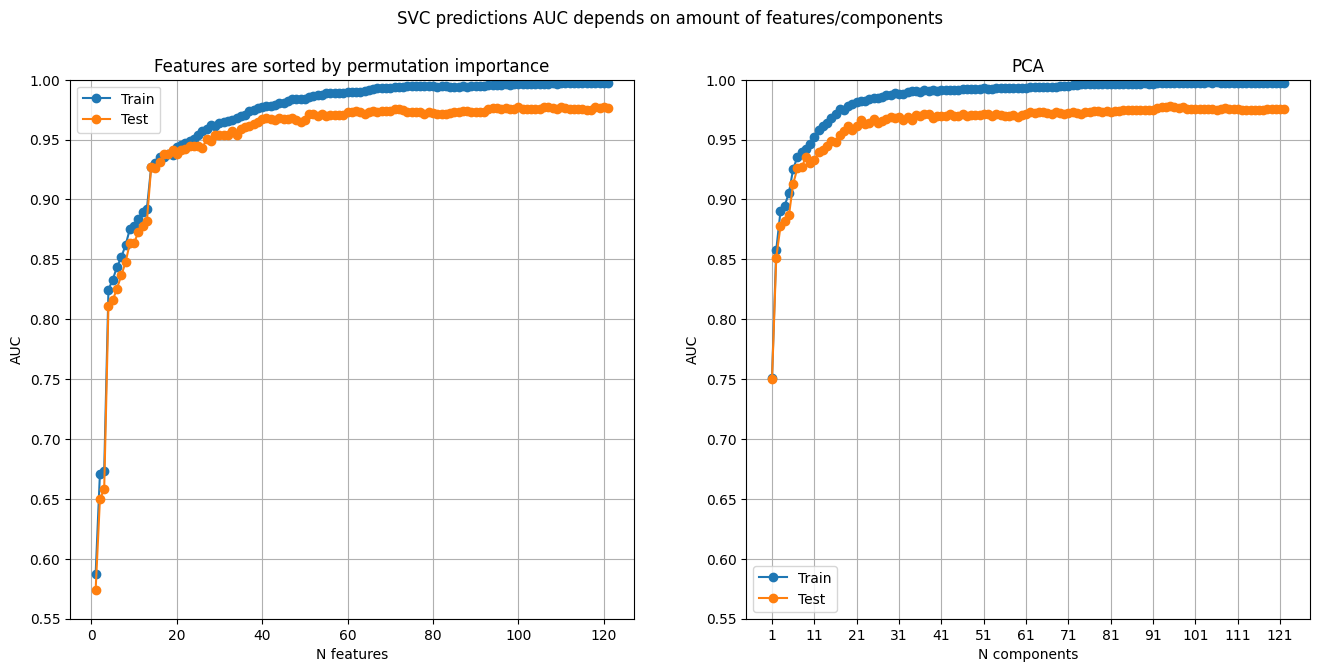

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# ax1.set_xlim(left=0, right=5)
ax1.set_ylim(bottom=0.55, top=1)

ax1.plot(num_features, acc_train, '-o', label='Train')
ax1.plot(num_features, acc_test, '-o', label='Test')
ax1.legend()
plt.xticks(range(1, 122, 10))
ax1.grid()
ax1.set_title('Features are sorted by permutation importance')
ax1.set_ylabel('AUC')
ax1.set_xlabel('N features')

ax2.set_ylim(bottom=0.55, top=1)
ax2.plot(values, train_scores, '-o', label='Train')
ax2.plot(values, test_scores, '-o', label='Test')
ax2.legend()
plt.xticks(range(1, 122, 10))
ax2.grid()
ax2.set_title('PCA')
ax2.set_ylabel('AUC')
ax2.set_xlabel('N components')
# plt.show()
plt.suptitle('SVC predictions AUC depends on amount of features/components')
plt.savefig(f'{pics}/clf_dtree_balanced.png')